### Clustering metrics are
When ground truth values are not known,the following metrics are used<br>
1) Silhouette Score<br>
2) Davies Bouldini Score<br>
3) Calinski-Harabasz Index<br>

When ground truth values are known,the following metrics are used<br>
1) Mutual Information scores<br>
2) Homogeneity, completeness and V-measure<br>

#### Clustering metrics sklearn
- https://scikit-learn.org/stable/modules/clustering.html

### Silhoutte Score
a) The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. <br>
b) It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. <br>
c) This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.<br>
d) The Silhouette Score is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b-a) / max(a,b).<br>
e) b is the distance between each sample and the nearest cluster that the sample is not a part of while a is the mean distance within each cluster.<br>

#### silhoutte score = (b-a)/max(b,a)

a: The mean distance between a sample and all other points in the same class.<br>
b: The mean distance between a sample and all other points in the next nearest cluster<br>

a is also called cohesion. a should be small<br>
b is also called separation. b should be large<br>

A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

<img src="silhoutte_score.jpg">


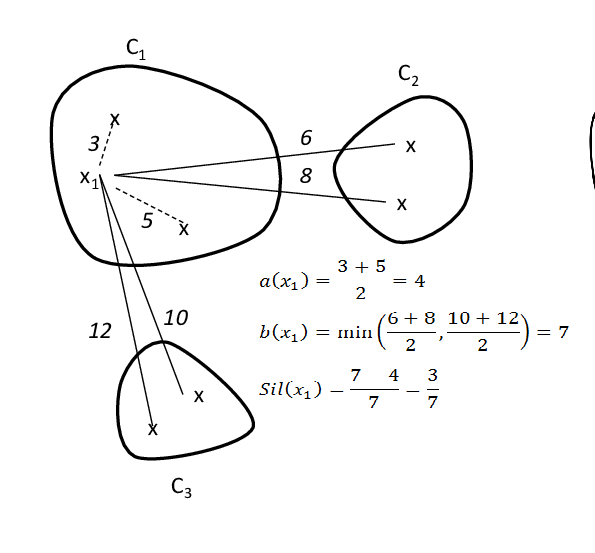

In [2]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
a=np.random.random((40,2))
b=3+np.random.random((40,2))
data=np.concatenate((a,b))
print(a.shape)
print(b.shape)
print(data.shape)

(40, 2)
(40, 2)
(80, 2)


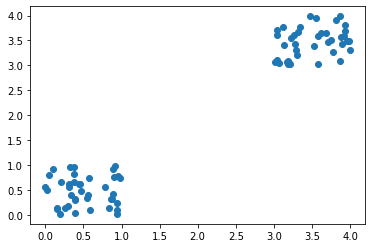

In [10]:
plt.scatter(data[:,0],data[:,1])
plt.show()

### Elbow Method

In [11]:
from sklearn.cluster import KMeans

WCSS
 [370.4028171902769, 14.86941407623234, 10.746023941145808, 7.815322834847448, 6.147017173814812, 4.697453150518053, 3.6502625635921206, 2.9805775862138484, 2.622106060071788]


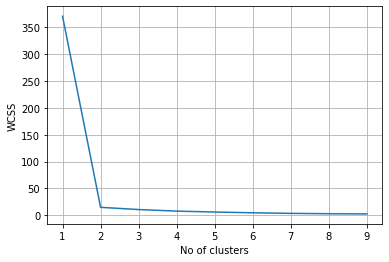

In [14]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,10): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(data)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,10)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Silhouette_score

In [15]:
from sklearn.metrics import silhouette_score

In [20]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(data)
    print(f'Silhouette Score at K={i}',silhouette_score(data,m.labels_))

Silhouette Score at K=2 0.8671705187346437
Silhouette Score at K=3 0.6603607495632343
Silhouette Score at K=4 0.4251101758026521
Silhouette Score at K=5 0.41791707324900085
Silhouette Score at K=6 0.4430835693425365
Silhouette Score at K=7 0.47008023985084685
Silhouette Score at K=8 0.44936323698051694
Silhouette Score at K=9 0.44338017365830973


- <b> Optimal value at K=2 as silhouette score highest and closest to 1

In [21]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 2.4 MB/s eta 0:00:01


In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

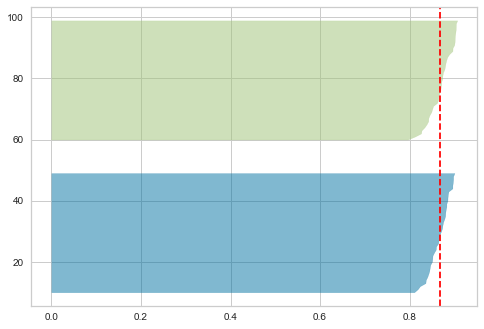

In [25]:
m2=KMeans(n_clusters=2)
visualizer=SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(data)
plt.show()

In [28]:
from collections import Counter

In [30]:
ypred2=m2.predict(data)
c1=Counter(ypred2)
print(c1)

Counter({1: 40, 0: 40})


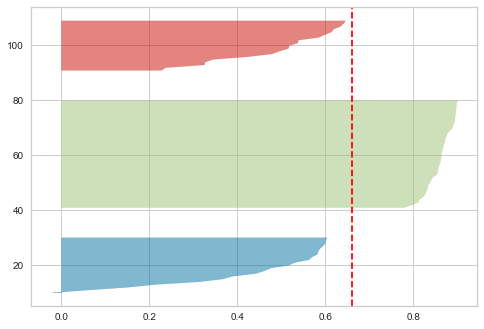

In [26]:
m3=KMeans(n_clusters=3)
visualizer=SilhouetteVisualizer(m3,colors='yellowbrick')
visualizer.fit(data)
plt.show()

In [29]:
ypred3=m3.predict(data)
c1=Counter(ypred3)
print(c1)

Counter({1: 40, 0: 21, 2: 19})


### KMeans at K=2

In [31]:
k2= KMeans(n_clusters=2)
k2.fit(data)
ypred2=k2.predict(data)
print(ypred2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [32]:
labels2= k2.labels_
print(labels2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [33]:
cent2= k2.cluster_centers_
print(cent2)

[[3.49263863 3.46001968]
 [0.50945142 0.48054587]]


In [39]:
import seaborn as sns

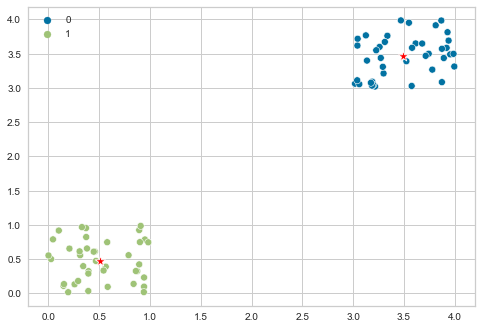

In [57]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=ypred2)
sns.scatterplot(x=cent2[:,0],y=cent2[:,1],color='red',marker='*',s=120)
plt.show()

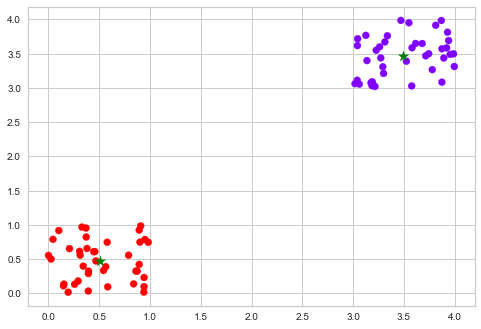

In [56]:
plt.scatter(data[:,0],data[:,1],c=ypred2,cmap='rainbow')
plt.scatter(cent2[:,0],cent2[:,1],color='green',marker='*',s=120)
plt.show()